<a href="https://colab.research.google.com/github/battulabharath27/Data-Science-Text-Minning/blob/master/DSAssignmentV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
import re
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#reading seven books as rawtext
rawtext1 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
rawtext2 = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
rawtext3 = nltk.corpus.gutenberg.raw('austen-sense.txt')
rawtext4 = nltk.corpus.gutenberg.raw('blake-poems.txt')
rawtext5 = nltk.corpus.gutenberg.raw('chesterton-ball.txt')
rawtext6 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
rawtext7 = nltk.corpus.gutenberg.raw('shakespeare-caesar.txt')

In [0]:
#taking author names array
rawtext = [rawtext1,rawtext2,rawtext3,rawtext4,rawtext5,rawtext6,rawtext7]
Authors = ["chesterton-thursday","shakespeare-hamlet","austen","blake","chesterton-ball","whitman","shakespeare-caesar"]


In [0]:
#method to clean up the documents(remove stop words)
def cleanupDoc(s):
     stopset = set(stopwords.words('english'))
     tokens = nltk.word_tokenize(s)
     cleanup = " ".join(filter(lambda word: word not in stopset, s.split()))
     return cleanup

In [0]:
#further clean up the docs
tokenized_sent = []
for i in range(0,(len(rawtext))):
    tokenized_sent.append(nltk.sent_tokenize(rawtext[i]))
    for j in range(len(tokenized_sent[i])):
        clean = []
        clean = re.sub('[^a-zA-Z]', ' ',tokenized_sent[i][j])
        clean = clean.lower()
        clean = cleanupDoc(clean)
        tokenized_sent[i][j] = ''.join(clean)  

In [0]:
#labelling the docs with author names
tokenized_sent_label = []
for i in range(0,(len(rawtext))):
    innersentence = []
    for j in range(0,len(tokenized_sent[i])):
        innersentence.append([(tokenized_sent[i][j]),(Authors[i])])   
    tokenized_sent_label.append(innersentence)


In [0]:
#concatenating all docs into the one set of sentences
tokenized_sent_label_concat = []
for i in range(0,(len(rawtext))):
    for j in range(0,len(tokenized_sent[i])):
        tokenized_sent_label_concat.append(tokenized_sent_label[i][j])

In [0]:
#converting it into pandas
import pandas as pd

df = pd.DataFrame(tokenized_sent_label_concat,columns=["Sentences","Authors"])


In [0]:
#info and description of our data frame
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21174 entries, 0 to 21173
Data columns (total 2 columns):
Sentences    21174 non-null object
Authors      21174 non-null object
dtypes: object(2)
memory usage: 331.0+ KB


,Sentences,Authors
count,21174,21174
unique,19657,7
top,,austen
freq,202,4833


In [0]:
#head of our cleaned data frame
df.head()

,Sentences,Authors
0,man thursday g k chesterton edmund clerihew be...,chesterton-thursday
1,science announced nonentity art admired decay ...,chesterton-thursday
2,like white lock whistler lit aimless gloom men...,chesterton-thursday
3,life fly faded death drone stung world old ind...,chesterton-thursday
4,twisted even decent sin shapes named men asham...,chesterton-thursday


In [0]:
#Counting the sentences for each author
b1 = []
for i in range(0,len(Authors)):
    Author = Authors[i]
    b1.append(df.loc[df['Authors']==str(Author)])

count = []
for i in range(0,(len(b1))):
    count.append(b1[i].shape[0])

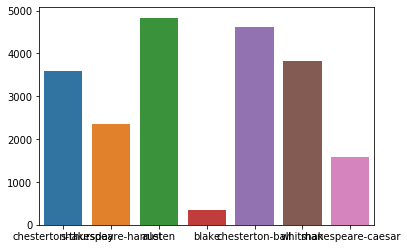

In [0]:
#Data Visualization
import seaborn as sns
sns.barplot(Authors,count)

In [0]:
df['Authors'].unique()

array(['chesterton-thursday', 'shakespeare-hamlet', 'austen', 'blake',
       'chesterton-ball', 'whitman', 'shakespeare-caesar'], dtype=object)

In [0]:
#taking the required features from the data
X = df['Sentences']
y = df['Authors']


In [0]:
#building the Bag of Words using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [0]:
X = cv.fit_transform(X)

In [0]:
#checking our vectorized data i.e., sparse matrix
X

<21174x22660 sparse matrix of type '<class 'numpy.int64'>'
	with 206473 stored elements in Compressed Sparse Row format>

In [0]:
#Applying TF - IDF vectorizer on the data
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#with N_Gram range with Tri-gram
tfidf = TfidfVectorizer(ngram_range=(1,3))

X_tfidf=tfidf.fit_transform(df['Sentences'])
X_tfidf


<21174x367081 sparse matrix of type '<class 'numpy.float64'>'
	with 579319 stored elements in Compressed Sparse Row format>

In [0]:
#splitting the data(using Count Vectorizer) into train test model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)



In [0]:
#splitting the data into(using TFIDF Vectorizer) into train test model
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y,test_size=0.3,random_state=101)

In [0]:
#Multinomial Naives Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [0]:
#fit the naives bayes using count Vectorizer
j=nb.fit(X_train,y_train)

In [0]:
#fitting the naive bayes using tfidf(3-gram) Vectorizer
j_tf = nb.fit(X_tfidf_train,y_train)

In [0]:
j


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
j_tf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions_Mnb = nb.predict(X_test)

In [0]:
#predictions with tfidf test
predictions_Mnb_tf = nb.predict(X_tfidf_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
print(confusion_matrix(y_test,predictions_Mnb))
print('\n')
print(classification_report(y_test,predictions_Mnb))

[[1330    1   52   16    1   14   29]
 [  12   11   11    3    1    2   58]
 [ 167    0 1019   94    2   11   88]
 [ 148    0  291  614    1    7   49]
 [  25    0   15    0  344   59   17]
 [  45    0   20    8   21  609   16]
 [  89    0   64   17    1   15  956]]


                     precision    recall  f1-score   support

             austen       0.73      0.92      0.82      1443
              blake       0.92      0.11      0.20        98
    chesterton-ball       0.69      0.74      0.71      1381
chesterton-thursday       0.82      0.55      0.66      1110
 shakespeare-caesar       0.93      0.75      0.83       460
 shakespeare-hamlet       0.85      0.85      0.85       719
            whitman       0.79      0.84      0.81      1142

           accuracy                           0.77      6353
          macro avg       0.82      0.68      0.70      6353
       weighted avg       0.78      0.77      0.76      6353



In [0]:
print(confusion_matrix(y_test,predictions_Mnb_tf))
print('\n')
print(classification_report(y_test,predictions_Mnb_tf))

[[1369    0   52    4    0    6   12]
 [  22    0   12    4    0    1   59]
 [ 217    0 1065   47    0    4   48]
 [ 224    0  382  482    0    0   22]
 [  53    0   44    3  261   61   38]
 [  90    0   44    3    5  555   22]
 [ 146    0  115   11    0    2  868]]


                     precision    recall  f1-score   support

             austen       0.65      0.95      0.77      1443
              blake       0.00      0.00      0.00        98
    chesterton-ball       0.62      0.77      0.69      1381
chesterton-thursday       0.87      0.43      0.58      1110
 shakespeare-caesar       0.98      0.57      0.72       460
 shakespeare-hamlet       0.88      0.77      0.82       719
            whitman       0.81      0.76      0.79      1142

           accuracy                           0.72      6353
          macro avg       0.69      0.61      0.62      6353
       weighted avg       0.75      0.72      0.71      6353



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#Getting accuracy score using BOW (Count Vectorizer)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_Mnb)

0.7686132535809853

In [0]:
#Getting accuracy score using tfidf(3-gram) Vectorizer
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_Mnb_tf)

0.7240673697465764

In [0]:
  #Now using the first algorithm
  #Decision Tree ALgorithm with BOW
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions_dtree = dtree.predict(X_test)



In [0]:
#Getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_dtree)


0.6079017786872344

In [0]:
#classification report and confusion matrix for the decision tree
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_dtree))
print('\n')
print(classification_report(y_test,predictions_dtree))


[[1038   10  136  130   17   28   84]
 [  11   19    7    5    6    5   45]
 [ 176   10  785  236   30   43  101]
 [ 149   11  239  589   30   23   69]
 [  20    1   19   33  303   62   22]
 [  54    1   34   55   42  487   46]
 [ 137   12  137  161   21   33  641]]


                     precision    recall  f1-score   support

             austen       0.65      0.72      0.69      1443
              blake       0.30      0.19      0.23        98
    chesterton-ball       0.58      0.57      0.57      1381
chesterton-thursday       0.49      0.53      0.51      1110
 shakespeare-caesar       0.67      0.66      0.67       460
 shakespeare-hamlet       0.72      0.68      0.70       719
            whitman       0.64      0.56      0.60      1142

           accuracy                           0.61      6353
          macro avg       0.58      0.56      0.57      6353
       weighted avg       0.61      0.61      0.61      6353



In [0]:
#Decision Tree algorithm using Tfidf Vectorizer
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_tfidf_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions_dtree_tf = dtree.predict(X_tfidf_test)



In [0]:
#Getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_dtree_tf)


0.6175035416338738

In [0]:
#NOW using our second algorithm i.e., SVM
#SVM modeling using BOW
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predictions and generating the classification and confusion report
predictions_svc = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print(classification_report(y_test,predictions_svc))


[[1132    0  157   17    0    8  129]
 [  11    4    9    3    0    1   70]
 [ 108    0 1054   40    2    7  170]
 [ 114    0  406  476    1    2  111]
 [  14    0   48    3  252   44   99]
 [  42    0   58    5    9  489  116]
 [  70    0  112    9    0    3  948]]


                     precision    recall  f1-score   support

             austen       0.76      0.78      0.77      1443
              blake       1.00      0.04      0.08        98
    chesterton-ball       0.57      0.76      0.65      1381
chesterton-thursday       0.86      0.43      0.57      1110
 shakespeare-caesar       0.95      0.55      0.70       460
 shakespeare-hamlet       0.88      0.68      0.77       719
            whitman       0.58      0.83      0.68      1142

           accuracy                           0.69      6353
          macro avg       0.80      0.58      0.60      6353
       weighted avg       0.74      0.69      0.68      6353



In [0]:
#Getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_svc)

0.685502912010074

In [0]:
#SVM Modelling using TFidf
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_tfidf_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predictions and generating the classification and confusion report using tfidf
predictions_svc_tf = svc_model.predict(X_tfidf_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_svc_tf))
print('\n')
print(classification_report(y_test,predictions_svc_tf))

[[1223    0  116   31    0    8   65]
 [   7   13   11    2    0    1   64]
 [  78    0 1095   84    1    8  115]
 [  80    0  375  594    0    1   60]
 [  12    0   38    8  295   52   55]
 [  28    0   45   20    8  551   67]
 [  42    0   96   15    0    5  984]]


                     precision    recall  f1-score   support

             austen       0.83      0.85      0.84      1443
              blake       1.00      0.13      0.23        98
    chesterton-ball       0.62      0.79      0.69      1381
chesterton-thursday       0.79      0.54      0.64      1110
 shakespeare-caesar       0.97      0.64      0.77       460
 shakespeare-hamlet       0.88      0.77      0.82       719
            whitman       0.70      0.86      0.77      1142

           accuracy                           0.75      6353
          macro avg       0.83      0.65      0.68      6353
       weighted avg       0.77      0.75      0.74      6353



In [0]:
#Getting accuracy score using tfidf
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_svc_tf)

0.7484652919880371

In [0]:
#Now using our third algorithm
#K-Nearest Neightbor using BOW
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
predictions_knn = knn.predict(X_test)

In [0]:
#classification and confusion report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))


[[645   6 198 163  36 249 146]
 [ 13  15  11   6   2  17  34]
 [177  14 519 216  67 249 139]
 [157  12 210 374  40 229  88]
 [ 26   1  38  20 234 121  20]
 [ 45   2  41  29  50 520  32]
 [123  14 151  80  45 275 454]]


                     precision    recall  f1-score   support

             austen       0.54      0.45      0.49      1443
              blake       0.23      0.15      0.19        98
    chesterton-ball       0.44      0.38      0.41      1381
chesterton-thursday       0.42      0.34      0.37      1110
 shakespeare-caesar       0.49      0.51      0.50       460
 shakespeare-hamlet       0.31      0.72      0.44       719
            whitman       0.50      0.40      0.44      1142

           accuracy                           0.43      6353
          macro avg       0.42      0.42      0.41      6353
       weighted avg       0.46      0.43      0.43      6353



In [0]:
#Getting accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_knn)

0.43459782779789075

In [0]:
#K Nearest Neighbour using TFidf
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tfidf_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
predictions_knn_tf = knn.predict(X_tfidf_test)

In [0]:
#classification and confusion report for KNN using tfidf
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_knn_tf))
print('\n')
print(classification_report(y_test,predictions_knn_tf))

[[ 204    2   52   29    6 1127   23]
 [   1   11    1    1    0   79    5]
 [  41    3  209   69   16 1010   33]
 [  29    0   67  190    3  815    6]
 [   7    1    6    4  177  262    3]
 [  12    0   10    6   26  657    8]
 [  19    2   25   19    7  905  165]]


                     precision    recall  f1-score   support

             austen       0.65      0.14      0.23      1443
              blake       0.58      0.11      0.19        98
    chesterton-ball       0.56      0.15      0.24      1381
chesterton-thursday       0.60      0.17      0.27      1110
 shakespeare-caesar       0.75      0.38      0.51       460
 shakespeare-hamlet       0.14      0.91      0.24       719
            whitman       0.68      0.14      0.24      1142

           accuracy                           0.25      6353
          macro avg       0.57      0.29      0.27      6353
       weighted avg       0.58      0.25      0.26      6353



In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions_knn_tf)

0.2538957972611365

In [0]:
#10 fold cross Validation
from sklearn.model_selection import KFold
cv = KFold(n_splits=10)
for traincv, testcv in cv.split(X_train):
    classifier = nltk.NaiveBayesClassifier.train(X_train[traincv[0]:traincv[len(traincv)-1]])
    print ('accuracy:', nltk.classify.util.accuracy(classifier, X_train[testcv[0]:testcv[len(testcv)-1]]))

ValueError: ignored